<a href="https://colab.research.google.com/github/ianxdxd/ML-Study/blob/main/PageRankAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Page Rank Algorithm implementation to pratice what I learned about Eigen Vectors

I'm going to use 5 pages that are linked in this way: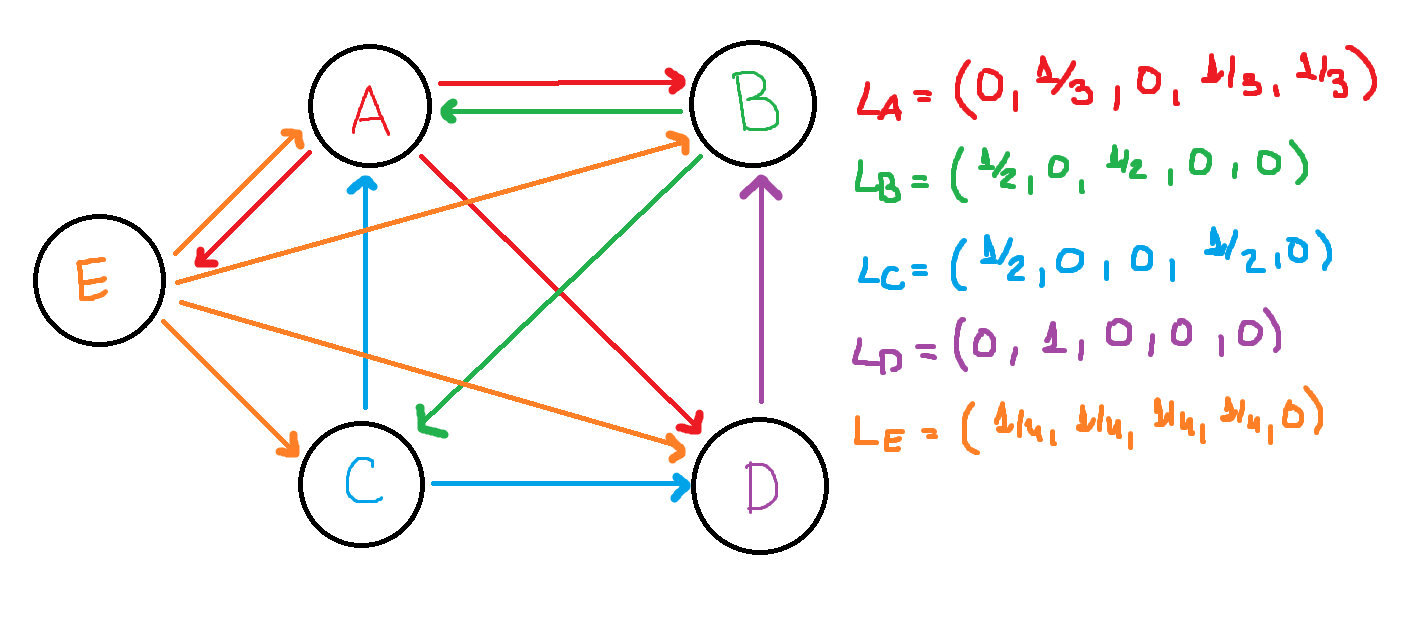

In [ ]:
import numpy as np

In [ ]:
A = np.array([0,1/3,0,1/3,1/3])
B = np.array([1/2,0,1/2,0,0])
C = np.array([1/2,0,0,1/2,0])
D = np.array([0,1,0,0,0])
E = np.array([1/4,1/4,1/4,1/4,0])

L = np.array([A,B,C,D,E])
L = L.transpose() # turn rows into columns to adjust
# print(L.shape)
L_wDamping = L * 0.85 + (1 - 0.85) / 5

'''
    Why are we searching for eigenvalues = 1? Because the corresponding eigenvector,
often normalized to sum to 1, is the dominant eigenvector and represents a stationary
distribution of the page ranks.
'''

# Eigenvalues are calculated by the det(L @ LambdaI)
# Eigenvectors are calculated by solving the systems from (L1 @ [x,y,z,w,t] = [0,0,0,0,0])
eigenvalues, eigenvectors = np.linalg.eig(L)
dominant_eigenvector = eigenvectors[:, np.isclose(eigenvalues, 1)] # Find the dominant eigenvector (corresponding to the eigenvalue 1)
dominant_eigenvector = dominant_eigenvector / np.sum(dominant_eigenvector) # Normalize the dominant eigenvector

eigenvaluesD, eigenvectorsD = np.linalg.eig(L_wDamping)
dominant_eigenvectorD = eigenvectorsD[:, np.isclose(eigenvaluesD, 1)] # Find the dominant eigenvector (corresponding to the eigenvalue 1)
dominant_eigenvectorD = dominant_eigenvectorD / np.sum(dominant_eigenvectorD) # Normalize the dominant eigenvector



print("Eigen values: \n", eigenvalues)
print("---------------------------")
print("Eigen Vectors: \n", eigenvectors)
print("---------------------------")
print("Dominant Eigen Vector: \n", dominant_eigenvector)
print("---------------------------")
print("Dominant Eigen Vector with Damping Factor: \n", dominant_eigenvectorD)



Eigen values: 
 [ 1.        +0.j         -0.36680743+0.61603589j -0.36680743-0.61603589j
 -0.13319257+0.15095608j -0.13319257-0.15095608j]
---------------------------
Eigen Vectors: 
 [[ 0.53612046+0.j          0.36804756+0.16695501j  0.36804756-0.16695501j
  -0.31080091+0.35225154j -0.31080091-0.35225154j]
 [ 0.62547387+0.j         -0.64217061+0.j         -0.64217061-0.j
  -0.29497883+0.01979358j -0.29497883-0.01979358j]
 [ 0.35741364+0.j          0.17688944+0.42434739j  0.17688944-0.42434739j
  -0.11748917-0.20746273j -0.11748917+0.20746273j]
 [ 0.40209035+0.j          0.11808271-0.40456829j  0.11808271+0.40456829j
  -0.05455453-0.16458239j -0.05455453+0.16458239j]
 [ 0.17870682+0.j         -0.02084909-0.18673412j -0.02084909+0.18673412j
   0.77782344+0.j          0.77782344-0.j        ]]
---------------------------
Dominant Eigen Vector: 
 [[0.25531915+0.j]
 [0.29787234+0.j]
 [0.17021277+0.j]
 [0.19148936+0.j]
 [0.08510638+0.j]]
---------------------------
Dominant Eigen Vector with

In [ ]:
def PageRank(L, d=0.85, max_iterations=100, tolerance_threshold=1e-6):

    num_nodes = L.shape[0]
    rank_scores = np.ones(num_nodes) / num_nodes  # assume all ranking are equall and normalize them 1/(number of pages)
    convergence_index = 1

    for i in range(1,max_iterations+1):

        '''
        Convergence is calculated by doing the L2 norm(Euclidean Norm) the vector to quantify how much
        the rank values have changed over each iteration.
        Benefits:
            a) Single scalar value, that is easier to compare to the tolerance
               threshold;
            b) Scale Independence, since it provides a non magnitude biased
               measure of change;
            c) Stability and precision.
        '''

        rank_scores_new = (1-d)/num_nodes + d * (L @ rank_scores)
        convergence = np.linalg.norm(rank_scores_new - rank_scores,1)
        rank_scores = rank_scores_new

        if convergence > tolerance_threshold:
            convergence_index += 1

        print(f"Iteration {i}: {rank_scores}")
    return rank_scores, convergence_index

print("-----------------------------------------------------------------------")

r, conv_iteration = PageRank(L)
for i in range(len(r)):
    r[i] *= 100 # Multiply each rank by 100 to get percentages
print("Final Page Rank: ", r)
print("Convergence Iteration: ", conv_iteration)

-----------------------------------------------------------------------
Iteration 1: [0.2425     0.29916667 0.1575     0.21416667 0.08666667]
Iteration 2: [0.2425     0.29916667 0.1755625  0.1840625  0.09870833]
Iteration 3: [0.25273542 0.27613698 0.17812135 0.19429792 0.09870833]
Iteration 4: [0.24403531 0.28773712 0.16833374 0.19828546 0.10160837]
Iteration 5: [0.24542189 0.28927776 0.17388005 0.19227695 0.09914334]
Iteration 6: [0.24791003 0.28403957 0.17401101 0.19450318 0.0995362 ]
Iteration 7: [0.24582294 0.28672033 0.17186826 0.1953473  0.10024118]
Iteration 8: [0.2462014  0.28699629 0.17315739 0.19399509 0.09964983]
Iteration 9: [0.2467409  0.28582848 0.17314901 0.19452454 0.09975706]
Iteration 10: [0.24626381 0.28645416 0.17267548 0.19469663 0.09990992]
Iteration 11: [0.24636096 0.28649774 0.17297388 0.19439268 0.09977475]
Iteration 12: [0.24647757 0.28623819 0.17296367 0.1945183  0.09980227]
Iteration 13: [0.24636877 0.28638385 0.17285921 0.19455285 0.09983531]
Iteration 14: 